In [2]:
!pip install pandas


  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/30/6f/910f62af8642c94acca4fff529944c1e9463cf118742f7ee1a583fc6449c/pandas-2.1.1-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Using cached pandas-2.1.1-cp311-cp311-macosx_10_9_x86_64.whl.metadata (18 kB)
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/32/4d/aaf7eff5deb402fd9a24a1449a8119f00d74ae9c2efa79f8ef9994261fc2/pytz-2023.3.post1-py2.py3-none-any.whl.metadata
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
Using cached pandas-2.1.1-cp311-cp311-macosx_10_9_x86_64.whl (11.6 MB)
Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: pip install --upgrade pip


In [20]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_hastie_10_2
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

In [5]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/f2/b4/c273b046e0f14e76ec33fdce82d70ddce1c796aaabadf436b3b8bf01ffb5/scikit_learn-1.3.1-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/b1/a6/b6d66d4f4045ba59200d25f254ccd63340162c903f95231e3ae6863fc4ae/scipy-1.11.3-cp311-cp311-macosx_10_9_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 493.6 kB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3

In [6]:
def get_error_rate(pred,Y):
    return sum(pred!=Y)/float(len(Y))

In [14]:
def print_error_rate(err):
    print ('Error rate: Training: %.4f - Test: %.4f' % err)

In [28]:
def generic_clf(Y_train,X_train,Y_test,X_test,clf):
    clf.fit(X_train,Y_train)
    pred_train=clf.predict(X_train)
    pred_test=clf.predict(X_test)
    return get_error_rate(pred_train,Y_train),get_error_rate(pred_test,Y_test)


In [16]:
def adaboost_clf(Y_train,X_train,Y_test,X_test,M,clf):
    n_train,n_test=len(X_train),len(X_test)
    w=np.ones(n_train)/n_train
    pred_train,pred_test=[np.zeros(n_train),np.zeros(n_test)]
    for i in range(M):
        clf.fit(X_train,Y_train,sample_weight=w)
        pred_train_i=clf.predict(X_train)
        pred_test_i=clf.predict(X_test)
        #chứa thoong tin các mẫu bị dự đoán sai
        miss=[int(x) for x in (pred_train_i!=Y_train)]
        # miss2 có giá trị 1 nếu đoán đúng -1 nếu đoán sai
        miss2=[x if x==1 else -1 for x in miss]
        err_m=np.dot(w,miss)/sum(w)
        alpha_m=0.5*np.log((1-err_m)/float(err_m))
        w=np.multiply(w,np.exp([float(x)*alpha_m for x in miss2]))
        #cộng vecto 2 danh sách pred_train và  [x * alpha_m for x in pred_train_i].
        pred_train=[sum(x) for x in zip(pred_train,[x*alpha_m for x in pred_train_i])]
        pred_test=[sum(x) for x in zip(pred_test,[x*alpha_m for x in pred_test_i])]
    #chuyển đội dự đoán tổng hợp thành nhị phân 
    pred_train,pred_test=np.sign(pred_train),np.sign(pred_test)
    return get_error_rate(pred_train,Y_train),get_error_rate(pred_test,Y_test)




In [17]:
def plot_error_rate(er_train, er_test):
    df_error = pd.DataFrame([er_train, er_test]).T
    df_error.columns = ['Training', 'Test']
    plot1 = df_error.plot(linewidth = 3, figsize = (8,6),
            color = ['lightblue', 'darkblue'], grid = True)
    plot1.set_xlabel('Number of iterations', fontsize = 12)
    plot1.set_xticklabels(range(0,450,50))
    plot1.set_ylabel('Error rate', fontsize = 12)
    plot1.set_title('Error rate vs number of iterations', fontsize = 16)
    plt.axhline(y=er_test[0], linewidth=1, color = 'red', ls = 'dashed')


/var/folders/2x/58mh5hk95w14qtcfg35m710w0000gn/T/ipykernel_43426/751039801.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot1.set_xticklabels(range(0,450,50))


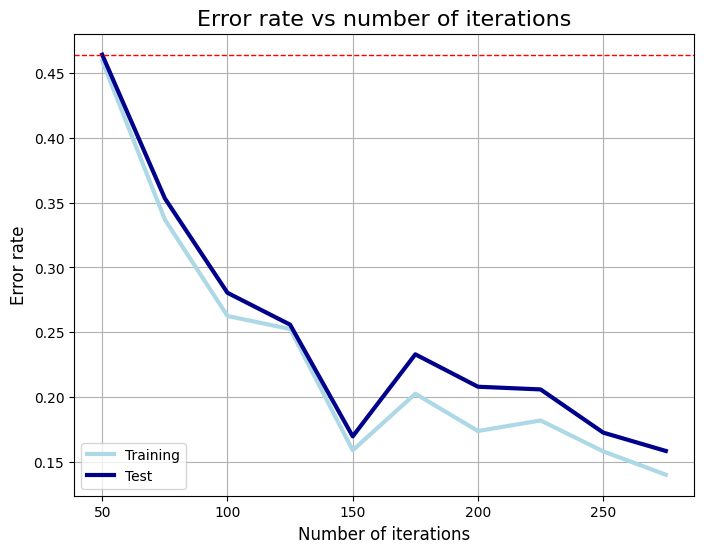

In [30]:
if __name__ == '__main__':
    
    # Read data
    x, y = make_hastie_10_2()
    df = pd.DataFrame(x)
    df['Y'] = y

    # Split into training and test set
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.8,random_state=1)
    
    # Fit a simple decision tree first
    clf_tree = DecisionTreeClassifier(max_depth = 1, random_state = 1)
    er_tree = generic_clf(Y_train, X_train, Y_test, X_test, clf_tree)
    
    # Fit Adaboost classifier using a decision tree as base estimator
    # Test with different number of iterations
    er_train, er_test = [er_tree[0]], [er_tree[1]]
    x_range = range(10, 100, 10)
    for i in x_range:    
        er_i = adaboost_clf(Y_train, X_train, Y_test, X_test, i, clf_tree)
        er_train.append(er_i[0])
        er_test.append(er_i[1])
    
    # Compare error rate vs number of iterations
    plot_error_rate(er_train, er_test)

In [ ]:
clf_tree = DecisionTreeClassifier(max_depth = 1, random_state = 1)


In [33]:
x, y = make_hastie_10_2()
df = pd.DataFrame(x)
df['Y'] = y
print(x.shape)
print(y.shape)

(12000, 10)
(12000,)
